In [44]:
from ExcitonBSEKeldysh import ExcitonMoS2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
Exciton=ExcitonMoS2(epsilon=2.5,N=24,vb=[6],cb=[7],spin_orbit=False,cutoff=0.6,shift=0.7)
Exciton.constructTrionBasis()

In [46]:
Exciton.NT

529

In [47]:
Exciton.constructTrionHamiltonian()
Exciton.constuctExcitonHamiltonian()

In [48]:
Exciton.calculateAbsobtionSpectrumTrion(eta=0.0005)
Exciton.calculateAbsobtionSpectrum(eta=0.0005)

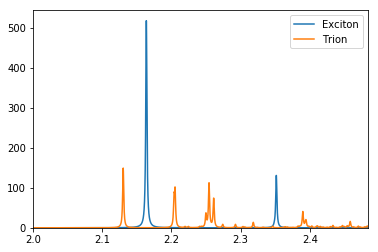

In [49]:
Exciton.plotAbsobtionSpectrum()
plt.xlim([2.0,Exciton.Egap])
plt.ylim([0,None])
plt.grid()
# # plt.yticks([])
# plt.xlabel('Energy [eV]')
# plt.ylabel('Absorption')
# plt.title('Full:{0}x{0} Cutoff:0.6 With SOC'.format(24))
# # plt.grid()
# plt.savefig('With_SOC/Trion_vs_Exciton_{0}.png'.format(24),dpi=600)


In [50]:
ET,DT=np.linalg.eigh(Exciton.HT)

In [53]:
ET-=Exciton.trion_spectrum_shift

In [55]:
P=np.zeros(Exciton.NT,dtype=complex)
for i in range(Exciton.NT):
    i1,i2,j=Exciton.trion_indexes[i]
    x1,y1,c1=Exciton.conduction_states[i1]
    x2,y2,c2=Exciton.conduction_states[i2]
    xv,yv,v=Exciton.valence_states[j]
    if x1==Exciton.trion_q[0] and y1==Exciton.trion_q[1]:
        if x2==xv and y2==yv:
            P[i]+=(Exciton.d[x2,y2,c2,v])
    if x2==Exciton.trion_q[0] and y2==Exciton.trion_q[1]:
        if x1==xv and y1==yv:
            P[i]-=(Exciton.d[x1,y1,c1,v])

In [56]:
PT=

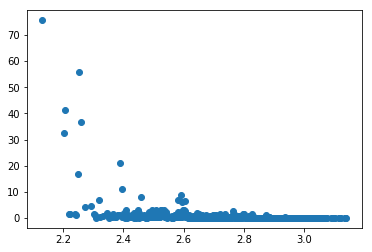

In [59]:
plt.plot(ET,PT,'o')

In [60]:
from scipy.sparse.linalg import eigsh

In [69]:
E,D=eigsh(Exciton.HT,which='SA',k=2)

In [70]:
np.abs(np.sum(D[:,0].conj()*P))**2

75.62477987903765